In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from test_module import test_results

In [18]:
def rolling_tests(y_pred, y_true):
    assert len(y_pred)==len(y_true)
    INTERVAL = 1
    START = 24
    LAPS = 24*90
    test_res=[]
    repr_laps = (LAPS)//10
    for i in range(LAPS):
        if (i+1)%repr_laps==0:
            print(f'Lap {i+1}/{LAPS}')
        tr = test_results(y_pred[:START+i*INTERVAL], y_true[:START+i*INTERVAL], disp_error=False, disp_resid=False, test_horizon=None, min_p=5,max_p=40)
        test_res.append(tr)
    
    rmse = [test_res[i][0] for i in range(LAPS)]
    mae = [test_res[i][1] for i in range(LAPS)]
    corr = [test_res[i][2] for i in range(LAPS)]
    sera = [test_res[i][3] for i in range(LAPS)]
    bias = [test_res[i][4] for i in range(LAPS)]
    rmse95 = [test_res[i][5] for i in range(LAPS)]

    return rmse, mae, corr, sera, bias, rmse95

def read_dataset(name='data/factor_capacidad_conjunto.csv',data='solar'):
    df = pd.read_csv(name,index_col=0,parse_dates=True)
    df = df.rename(columns={
        data: 'y'
    })
    return df[['y']]

df_simple = pd.read_csv('./results/xgboost_eolica_naive.csv', index_col=0,parse_dates=True)
df_simple_true = read_dataset(data='eolica')
df_simple = df_simple.merge(df_simple_true,how='left',left_index=True,right_index=True).dropna().rename(columns={
    'y_x': 'y_pred',
    'y_y': 'y_true',
})
res_simple = rolling_tests(df_simple['y_pred'].iloc[-365*24:],df_simple['y_true'].iloc[-365*24:])
df_complex = pd.read_csv('./results/xgboost_eolica_complex.csv', index_col=0,parse_dates=True)
df_complex_true = read_dataset(data='eolica')
df_complex = df_complex.merge(df_complex_true,how='left',left_index=True,right_index=True).dropna().rename(columns={
    'y_x': 'y_pred',
    'y_y': 'y_true',
})
res_complex = rolling_tests(df_complex['y_pred'].iloc[-365*24:],df_complex['y_true'].iloc[-365*24:])

Lap 216/2160
Lap 432/2160
Lap 648/2160
Lap 864/2160
Lap 1080/2160
Lap 1296/2160
Lap 1512/2160
Lap 1728/2160
Lap 1944/2160
Lap 2160/2160
Lap 216/2160
Lap 432/2160
Lap 648/2160
Lap 864/2160
Lap 1080/2160
Lap 1296/2160
Lap 1512/2160
Lap 1728/2160
Lap 1944/2160
Lap 2160/2160


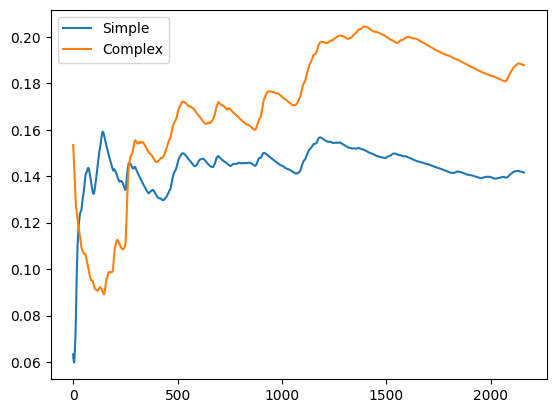

In [19]:
plt.plot(res_simple[0])
plt.plot(res_complex[0])
plt.legend(['Simple','Complex'])

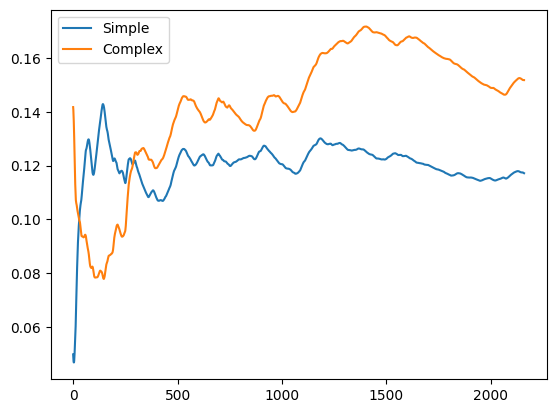

In [20]:
plt.plot(res_simple[1])
plt.plot(res_complex[1])
plt.legend(['Simple','Complex'])

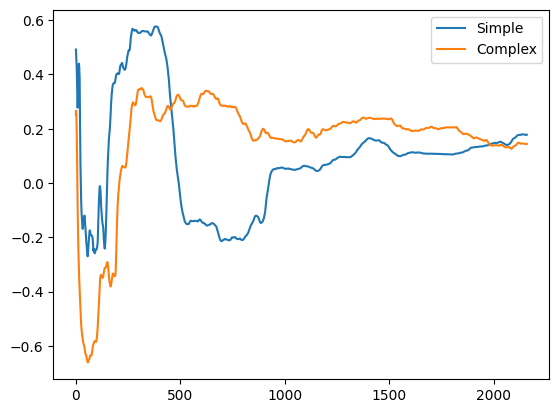

In [21]:
plt.plot(res_simple[2])
plt.plot(res_complex[2])
plt.legend(['Simple','Complex'])